<a href="https://colab.research.google.com/github/M-Woi/Group-Projects/blob/main/brain_tumor_classification_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

GIT: https://github.com/M-Woi/Group-Projects.git
Authors: Michał Golberg, Michał Wiśniowski

Research Question: "How can convolutional neural networks (CNNs) be leveraged to improve the identification and classification of brain tumors in CT scan images, with a focus on the four categories of 'glioma_tumor', 'pituitary_tumor', 'no_tumor', and 'meningioma_tumor'? This research seeks to explore and compare the performance of different CNN models in order to advance the accuracy and effectiveness of brain tumor diagnosis from medical imaging."


Introduction:
Computed Tomography (CT) scans play a crucial role in the diagnosis of brain tumors. They offer a non-invasive means of capturing detailed cross-sectional images of the human brain, providing valuable insights to medical practitioners. Brain tumors are a diverse group of pathologies with a wide range of clinical implications, making their accurate and timely identification essential for patient care.

Over the years, the field of medical imaging has witnessed significant advancements, and the integration of artificial intelligence (AI) techniques has been transformative. In particular, Convolutional Neural Networks (CNNs) have emerged as a powerful tool for image classification and object recognition. CNNs are inherently suited to the task of identifying patterns and features within medical images, making them a prime candidate for improving the diagnostic accuracy of brain tumors.

The objective of this research is to investigate the application of CNNs in the context of CT scan images for brain tumor classification. The research will focus on four primary categories: 'glioma_tumor', 'pituitary_tumor', cases with 'no_tumor' detected, and 'meningioma_tumor'. These categories encompass a spectrum of brain pathologies, each with its own distinct features and implications.

Through this research, we aim to address critical questions regarding the implementation of CNN models for the accurate and efficient diagnosis of brain tumors in CT scan images. The primary research question explores the performance and efficacy of different CNN architectures when applied to the specific task of classifying these brain tumors. By evaluating and comparing these models using relevant performance metrics, the study intends to provide valuable insights that can guide the selection of the most suitable CNN model for this medical application.

This research is motivated by the overarching goal of improving the diagnostic accuracy, speed, and overall patient care in the field of radiology. The outcomes of this study have the potential to significantly impact clinical practice and the lives of individuals by enhancing the detection and classification of brain tumors from CT scans.


Hypothesis:

Null Hypotheses (H0): There is no value difference in the accuracy and mean squared error (MSE) between models A, E, and F when classifying CT scan images of brain tumors into the categories 'glioma_tumor', 'pituitary_tumor', 'no_tumor', and 'meningioma_tumor'.

Alternate Hypotheses (H1):

    H0 for Accuracy: There is a value difference in the accuracy between models A, E, and F when classifying CT scan images of brain tumors.

    H0 for MSE: There is a value difference in the mean squared error (MSE) between models A, E, and F when classifying CT scan images of brain tumors.

Additional Alternate Hypotheses (H1):

    For Accuracy:
        H1A: Model A has the highest accuracy among the three models in classifying CT scan images of brain tumors.
        H1B: Model E has the highest accuracy among the three models in classifying CT scan images of brain tumors.
        H1C: Model F has the highest accuracy among the three models in classifying CT scan images of brain tumors.

    For MSE:
        H1M: Model A has the lowest mean squared error (MSE) among the three models in classifying CT scan images of brain tumors.
        H1N: Model E has the lowest mean squared error (MSE) among the three models in classifying CT scan images of brain tumors.
        H1O: Model F has the lowest mean squared error (MSE) among the three models in classifying CT scan images of brain tumors.

These hypotheses aim to compare the performance of models A, E, and F in classifying CT scan images of brain tumors based on accuracy and mean squared error. The null hypotheses state that there are no value differences, while the alternate hypotheses explore potential differences and identify which model performs the best in terms of accuracy and MSE. The analysis will help determine which model is most effective in this classification task.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install scikeras
!pip install visualkeras


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 18.4 MB/s eta 0:00:00


In [ ]:
# !pip install pillow

In [ ]:
#pip install --upgrade joblib

In [ ]:
import os
import io
import cv2
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
from IPython.display import display
import visualkeras

import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Activation,Concatenate
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from scikeras.wrappers import KerasClassifier
from tqdm import tqdm
from PIL import Image

import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.metrics import confusion_matrix, classification_report
from scipy.stats import f_oneway

##NEW

In [ ]:
classes = os.listdir("/content/drive/MyDrive/Colab Notebooks/brain-tumor-classification/Training")
print(classes)

['glioma_tumor', 'pituitary_tumor', 'no_tumor', 'meningioma_tumor']


In [ ]:
# Define a function to load images and labels from a directory
def load_images_from_directory(directory, image_size):
    X = []  # List to store images
    y = []  # List to store labels

    for class_name in os.listdir(directory):
        class_dir = os.path.join(directory, class_name)
        class_images = sorted(os.listdir(class_dir))  # Sort the images alphabetically

        for image_name in tqdm(class_images):
            img = cv2.imread(os.path.join(class_dir, image_name))
            img = cv2.resize(img, (image_size, image_size))
            X.append(img)
            y.append(class_name)

    return X, y

In [ ]:
# Define the desired image size
image_size = 150

# Specify the paths to training and testing directories
train_dir = '/content/drive/MyDrive/Colab Notebooks/brain-tumor-classification/Training'
test_dir = '/content/drive/MyDrive/Colab Notebooks/brain-tumor-classification/Testing'

# Load images and labels from the training and testing directories
X_train, y_train = load_images_from_directory(train_dir, image_size)
X_test, y_test = load_images_from_directory(test_dir, image_size)

# Combine the data from both training and testing sets if needed
X = X_train + X_test
y = y_train + y_test

100%|██████████| 100/100 [00:00<00:00, 183.74it/s]


In [ ]:
# Convert the lists of images and labels to NumPy arrays for further processing
X = np.array(X)
y = np.array(y)

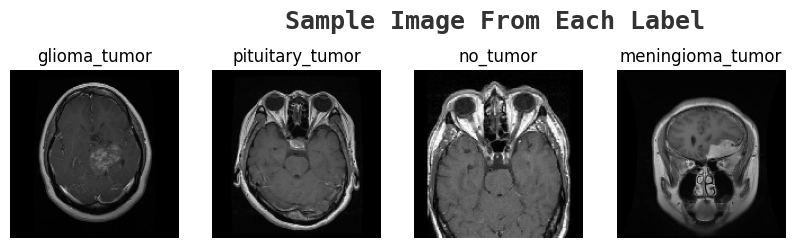

In [ ]:
# Initialize the variable k to 0
k = 0

# Create a subplot with 1 row and 4 columns and specify the figure size
fig, ax = plt.subplots(1, 4, figsize=(10, 10))

# Add a text annotation to the figure to provide a title
fig.text(s='Sample Image From Each Label', size=18, fontweight='bold',
         fontname='monospace', y=0.62, x=0.4, alpha=0.8)

# Iterate through each class (label) in the 'classes' list
for i in classes:
    j = 0  # Initialize a counter variable for iterating through images

    # Start an infinite loop to find an image with the current class label
    while True:
        # Check if the label of the j-th image matches the current class 'i'
        if y[j] == i:
            # Display the image at index 'j' in the k-th subplot
            ax[k].imshow(X[j])
            ax[k].set_title(y[j])  # Set the title of the subplot to the class label
            ax[k].axis('off')  # Turn off the axis for the subplot
            k += 1  # Increment the subplot index 'k'
            break  # Exit the loop when an image of the current class is found
        j += 1  # Move to the next image if the label doesn't match

# The code will continue to fill subplots until four images from different classes are displayed.


In [ ]:
# Split the data while maintaining class distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [ ]:
# Initialize empty lists to store the new labels
y_train_temp = []

# Iterate through each label in y_train
for i in y_train:
    # Find the index of the current label (class) in the 'classes' list
    index = classes.index(i)
    # Append the index (as an integer) to the 'y_train_temp' list
    y_train_temp.append(index)

# Update the 'y_train variable to use the new labels
y_train = y_train_temp
# Convert the integer-encoded labels in 'y_train to one-hot encoded vectors
y_train = tf.keras.utils.to_categorical(y_train, num_classes=len(classes))


In [ ]:
# Initialize an empty list to store the new labels for y_test
y_test_temp = []

# Iterate through each label in y_test
for i in y_test:
    # Find the index of the current label (class) in the 'classes' list
    index = classes.index(i)
    # Append the index (as an integer) to the 'y_test_new' list
    y_test_temp.append(index)

# Update the 'y_test' variable to use the new labels
y_test = y_test_temp
y_test = tf.keras.utils.to_categorical(y_test)

###Model A

In [ ]:
model_A = Sequential()

model_A.add(Conv2D(32, (3, 3), padding='same', input_shape=(image_size, image_size, 3)))
model_A.add(Activation('relu'))
model_A.add(BatchNormalization())
model_A.add(MaxPooling2D(pool_size=(2, 2)))
model_A.add(Dropout(0.25))

model_A.add(Conv2D(64, (3, 3), padding='same'))
model_A.add(Activation('relu'))
model_A.add(BatchNormalization())
model_A.add(MaxPooling2D(pool_size=(2, 2)))
model_A.add(Dropout(0.25))

model_A.add(Flatten())
model_A.add(Dense(128, activation='relu'))
model_A.add(BatchNormalization())
model_A.add(Dropout(0.5))
model_A.add(Dense(4, activation='softmax'))

In [ ]:
from tensorflow.keras.metrics import MeanSquaredError, AUC, Precision, Recall, F1Score

additional_metrics = [
    MeanSquaredError(),  # Mean Squared Error
]

# Define an optimizer and compile the model
model_A.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'] + additional_metrics) #SparseCategoricalCrossentropy #categorical_crossentropy

# Define callbacks
early_stopping_A = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
model_checkpoint_A = ModelCheckpoint('best_model_A.keras', monitor='val_accuracy', save_best_only=False) #to h5file/kerasfile


# Train the model
history_A = model_A.fit(X_train, y_train, validation_split=0.33, epochs=24, verbose=1, batch_size=12,
                                  callbacks=[early_stopping_A, model_checkpoint_A])

Epoch 1/24
122/122 [==============================] - 6s 33ms/step - loss: 1.3020 - accuracy: 0.5669 - mean_squared_error: 0.1528 - val_loss: 1.4550 - val_accuracy: 0.5499 - val_mean_squared_error: 0.1763
Epoch 2/24
122/122 [==============================] - 4s 33ms/step - loss: 0.7683 - accuracy: 0.7206 - mean_squared_error: 0.1020 - val_loss: 0.7224 - val_accuracy: 0.7271 - val_mean_squared_error: 0.0971
Epoch 3/24
122/122 [==============================] - 4s 29ms/step - loss: 0.6192 - accuracy: 0.7807 - mean_squared_error: 0.0821 - val_loss: 2.3061 - val_accuracy: 0.5000 - val_mean_squared_error: 0.1809
Epoch 4/24
122/122 [==============================] - 6s 47ms/step - loss: 0.4982 - accuracy: 0.8169 - mean_squared_error: 0.0674 - val_loss: 0.6118 - val_accuracy: 0.7978 - val_mean_squared_error: 0.0769
Epoch 5/24
122/122 [==============================] - 5s 38ms/step - loss: 0.3841 - accuracy: 0.8668 - mean_squared_error: 0.0505 - val_loss: 0.5922 - val_accuracy: 0.7867 - val_me

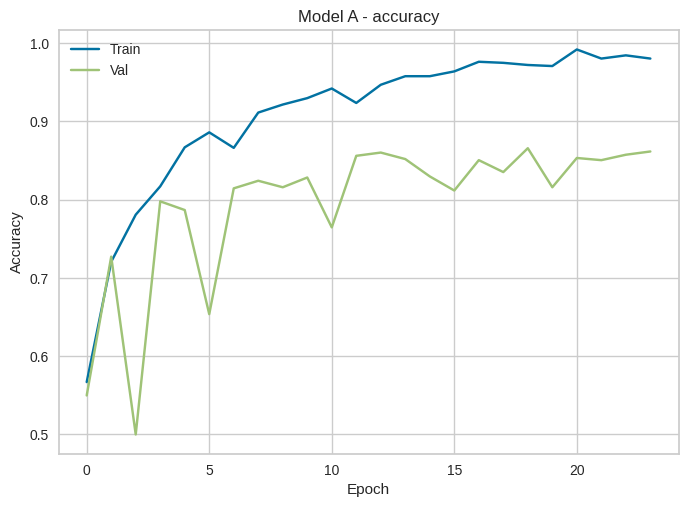

In [ ]:
plt.plot(history_A.history['accuracy'])
plt.plot(history_A.history['val_accuracy'])
plt.title('Model A - accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

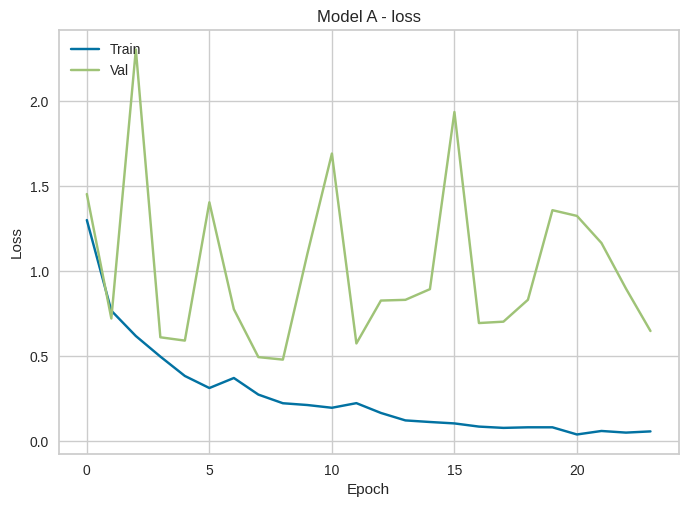

In [ ]:
plt.plot(history_A.history['loss'])
plt.plot(history_A.history['val_loss'])
plt.title('Model A - loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

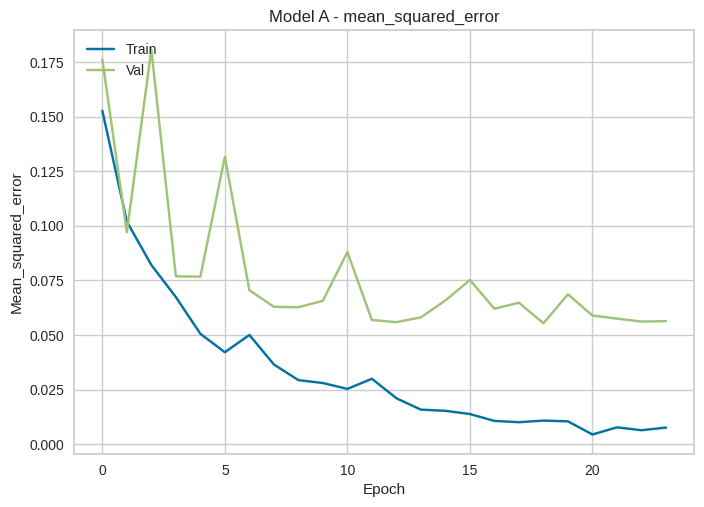

In [ ]:
plt.plot(history_A.history['mean_squared_error'])
plt.plot(history_A.history['val_mean_squared_error'])
plt.title('Model A - mean_squared_error')
plt.ylabel('Mean_squared_error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [ ]:
y_pred_A = model_A.predict(X_test, verbose=1, batch_size=32)

34/34 [==============================] - 0s 7ms/step


<Axes: >

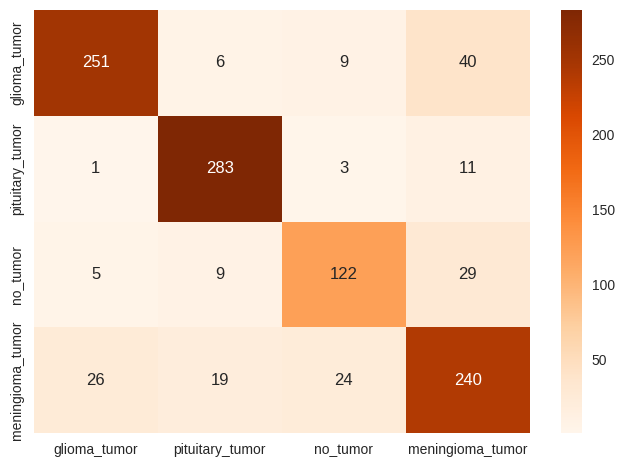

In [ ]:
CX_A =confusion_matrix(y_test.argmax(axis=1), y_pred_A.argmax(axis=1))
sns.heatmap(CX_A,annot=True, fmt=".0f", cmap='Oranges', xticklabels = classes, yticklabels = classes)


In [ ]:
report_A = classification_report(y_test.argmax(axis=1), y_pred_A.argmax(axis=1),)
print(report_A)

              precision    recall  f1-score   support

           0       0.89      0.82      0.85       306
           1       0.89      0.95      0.92       298
           2       0.77      0.74      0.76       165
           3       0.75      0.78      0.76       309

    accuracy                           0.83      1078
   macro avg       0.83      0.82      0.82      1078
weighted avg       0.83      0.83      0.83      1078



In [ ]:
eval_A = model_A.evaluate(
    x=X_test,
    y=y_test,
    batch_size=32,
    verbose=1,
    return_dict =True)

34/34 [==============================] - 0s 10ms/step - loss: 0.7207 - accuracy: 0.8312 - mean_squared_error: 0.0675


In [ ]:
eval_A = pd.Series(eval_A)
eval_A

loss                  0.720728
accuracy              0.831169
mean_squared_error    0.067457
dtype: float64

###Model E

In [ ]:
img_datagen_E = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True)

img_datagen_E.fit(X_train)
img_datagen_E.fit(X_test)

In [ ]:
# Create a generator for training data
train_data_generator = img_datagen_E.flow(X_train, y_train, batch_size=32)

In [ ]:
model_E = Sequential()

model_E.add(Conv2D(64, (3, 3), padding='same',input_shape=(image_size,image_size,3)))
model_E.add(Activation('relu'))
model_E.add(BatchNormalization())

model_E.add(Conv2D(64, (3, 3)))
model_E.add(Activation('relu'))
model_E.add(MaxPooling2D(pool_size=(2, 2)))
model_E.add(BatchNormalization())
model_E.add(Dropout(0.33))

model_E.add(Conv2D(64, (3, 3), padding='same'))
model_E.add(Activation('relu'))
model_E.add(BatchNormalization())

model_E.add(Conv2D(64, (3, 3)))
model_E.add(Activation('relu'))
model_E.add(MaxPooling2D(pool_size=(2, 2)))
model_E.add(BatchNormalization())
model_E.add(Dropout(0.33))

model_E.add(Conv2D(64, (3, 3), padding='same'))
model_E.add(Activation('relu'))
model_E.add(BatchNormalization())

model_E.add(Flatten())
model_E.add(Dropout(0.5))
model_E.add(Dense(512))
model_E.add(Activation('relu'))
model_E.add(BatchNormalization())
model_E.add(Dense(4))
model_E.add(Activation('softmax'))

#model_E.summary()

In [ ]:
from tensorflow.keras.metrics import MeanSquaredError, AUC, Precision, Recall, F1Score

# Specify the additional metrics
additional_metrics = [
    MeanSquaredError(),  # Mean Squared Error
]

# Define an optimizer and compile the model
model_E.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'] + additional_metrics)

# Define callbacks
early_stopping_E = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
model_checkpoint_E = ModelCheckpoint('best_model_E.keras', monitor='val_accuracy', save_best_only=False) #to h5file/keras

In [ ]:
# Train the model
history_E = model_E.fit(X_train, y_train, validation_split=0.33, epochs=24, verbose=1, batch_size=12,
                                  callbacks=[early_stopping_E, model_checkpoint_E])

Epoch 1/24
122/122 [==============================] - 21s 125ms/step - loss: 1.3358 - accuracy: 0.6168 - mean_squared_error: 0.1400 - val_loss: 4.4016 - val_accuracy: 0.3144 - val_mean_squared_error: 0.2943
Epoch 2/24
122/122 [==============================] - 13s 109ms/step - loss: 0.6619 - accuracy: 0.7520 - mean_squared_error: 0.0878 - val_loss: 1.8613 - val_accuracy: 0.5623 - val_mean_squared_error: 0.1738
Epoch 3/24
122/122 [==============================] - 18s 147ms/step - loss: 0.5369 - accuracy: 0.7848 - mean_squared_error: 0.0751 - val_loss: 0.9801 - val_accuracy: 0.6953 - val_mean_squared_error: 0.1158
Epoch 4/24
122/122 [==============================] - 17s 140ms/step - loss: 0.4455 - accuracy: 0.8449 - mean_squared_error: 0.0595 - val_loss: 1.3331 - val_accuracy: 0.5332 - val_mean_squared_error: 0.1667
Epoch 5/24
122/122 [==============================] - 15s 126ms/step - loss: 0.3404 - accuracy: 0.8743 - mean_squared_error: 0.0467 - val_loss: 0.8565 - val_accuracy: 0.764

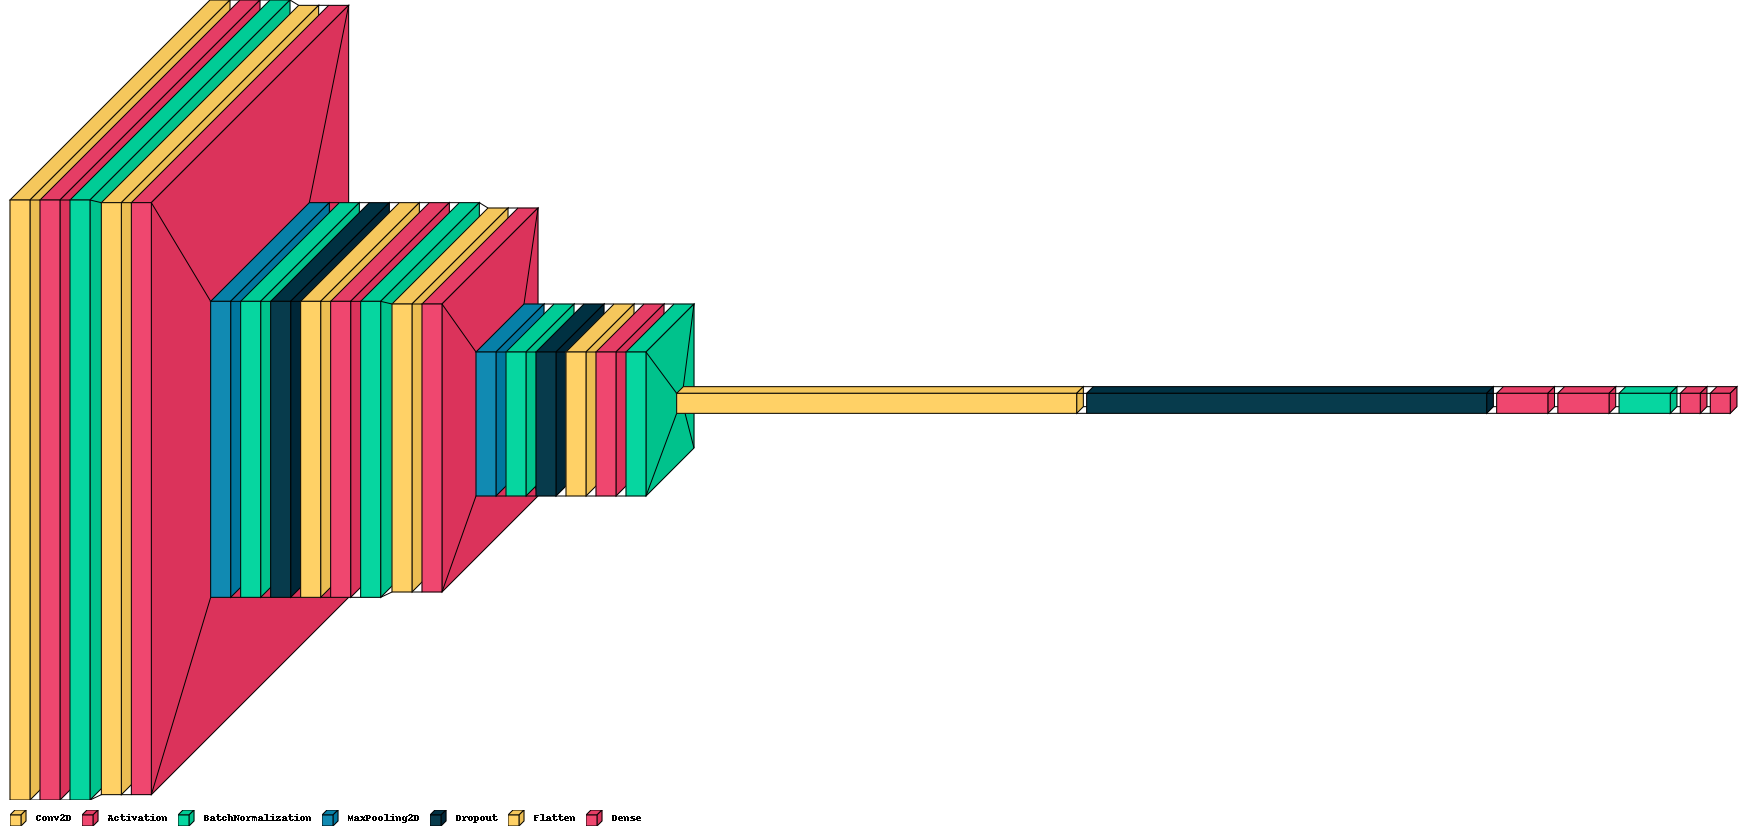

In [ ]:
visualkeras.layered_view(model_E, legend=True)

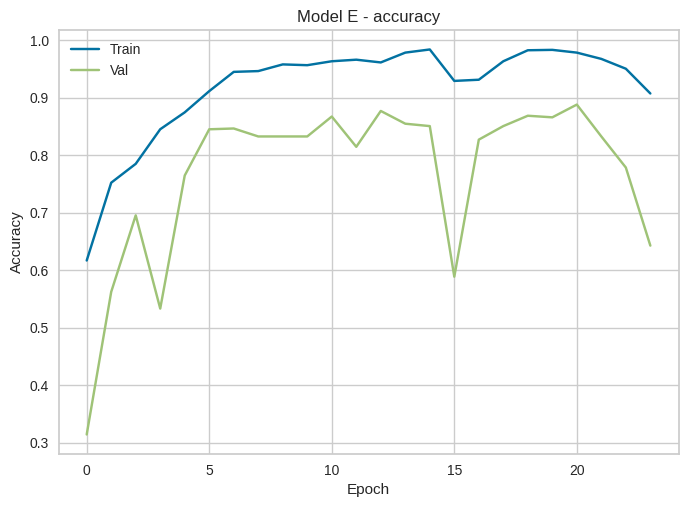

In [ ]:
plt.plot(history_E.history['accuracy'])
plt.plot(history_E.history['val_accuracy'])
plt.title('Model E - accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

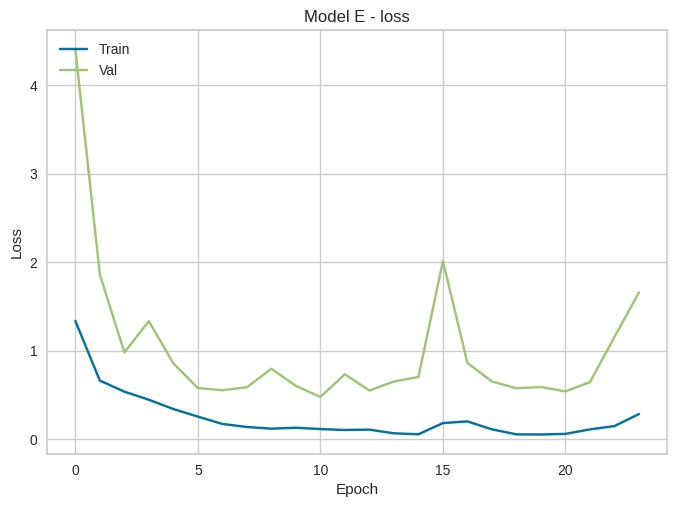

In [ ]:
plt.plot(history_E.history['loss'])
plt.plot(history_E.history['val_loss'])
plt.title('Model E - loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

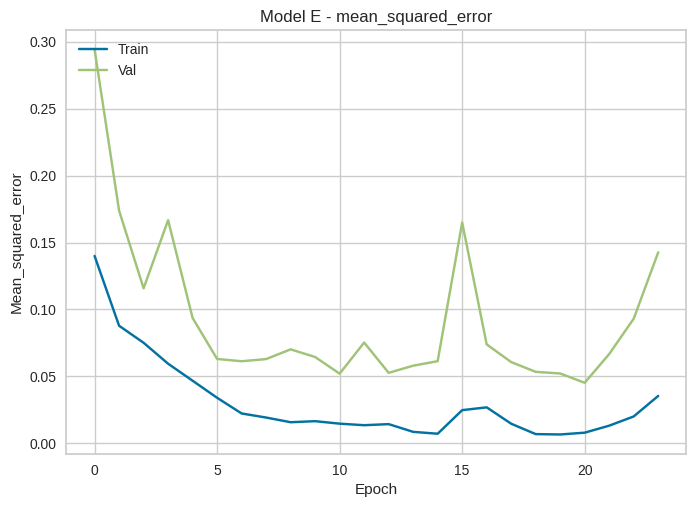

In [ ]:
plt.plot(history_E.history['mean_squared_error'])
plt.plot(history_E.history['val_mean_squared_error'])
plt.title('Model E - mean_squared_error')
plt.ylabel('Mean_squared_error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [ ]:
y_pred_E = model_E.predict(X_test, verbose=1, batch_size=32)

34/34 [==============================] - 3s 45ms/step


<Axes: >

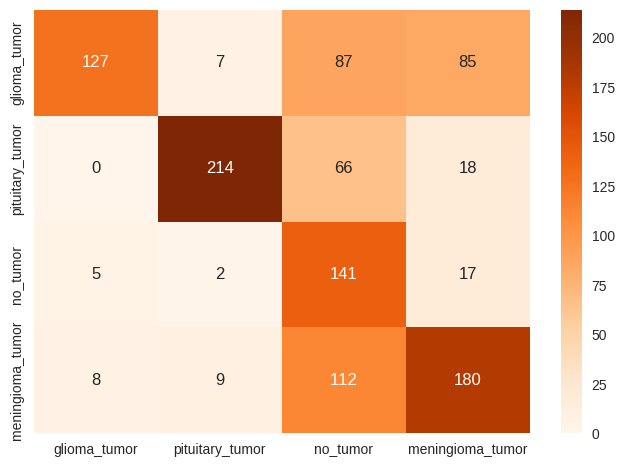

In [ ]:
CX_E =confusion_matrix(y_test.argmax(axis=1), y_pred_E.argmax(axis=1))
sns.heatmap(CX_E, annot=True, fmt=".0f", cmap='Oranges', xticklabels = classes, yticklabels = classes)


In [ ]:
report_E = classification_report(y_test.argmax(axis=1), y_pred_E.argmax(axis=1),)
print(report_E)

              precision    recall  f1-score   support

           0       0.91      0.42      0.57       306
           1       0.92      0.72      0.81       298
           2       0.35      0.85      0.49       165
           3       0.60      0.58      0.59       309

    accuracy                           0.61      1078
   macro avg       0.69      0.64      0.62      1078
weighted avg       0.74      0.61      0.63      1078



In [ ]:
eval_E = model_E.evaluate(
    x=X_test,
    y=y_test,
    batch_size=32,
    verbose=1,
    return_dict =True)

34/34 [==============================] - 1s 28ms/step - loss: 1.7883 - accuracy: 0.6141 - mean_squared_error: 0.1593


In [ ]:
eval_E = pd.Series(eval_E)
eval_E

loss                  1.788334
accuracy              0.614100
mean_squared_error    0.159281
dtype: float64

###Model F:

In [ ]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Sequential
import tensorflow as tf

# Load the MobileNet model with pre-trained weights
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(image_size,image_size,3)) # input_shape=(150, 150, 3)) or

# Create a Sequential model and add the MobileNet base
model_F = Sequential()
model_F.add(base_model)

# Add custom layers on top of the base MobileNet model
model_F.add(Conv2D(64, (3, 3), padding='same',input_shape=(image_size,image_size,3))) # input_shape=(image_size,image_size,3)))
model_F.add(MaxPooling2D(pool_size=(2, 2)))
model_F.add(Dropout(0.25))

model_F.add(Conv2D(64, (3, 3), padding='same'))
model_F.add(Activation('relu'))
model_F.add(BatchNormalization())
model_F.add(MaxPooling2D(pool_size=(2, 2)))
model_F.add(Dropout(0.25))

model_F.add(Flatten())
model_F.add(Dense(128, activation='relu'))
model_F.add(BatchNormalization())
model_F.add(Dropout(0.5))
model_F.add(Dense(4, activation='softmax'))


17225924/17225924 [==============================] - 0s 0us/step


In [ ]:
additional_metrics = [
    MeanSquaredError(),  # Mean Squared Error
]

# Define an optimizer and compile the model
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model_F.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'] + additional_metrics)


# Define callbacks
early_stopping_F = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
model_checkpoint_F = ModelCheckpoint('best_model_F.h5', monitor='val_accuracy', save_best_only=False) #to h5file

# Train the model

history_F = model_F.fit(X_train, y_train, validation_split=0.33, epochs=24, verbose=1, batch_size=32,
                                  callbacks=[early_stopping_F, model_checkpoint_F])




Epoch 1/24
46/46 [==============================] - ETA: 0s - loss: 1.5820 - accuracy: 0.4495 - mean_squared_error: 0.1912

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



46/46 [==============================] - 13s 131ms/step - loss: 1.5820 - accuracy: 0.4495 - mean_squared_error: 0.1912 - val_loss: 1.7265 - val_accuracy: 0.5042 - val_mean_squared_error: 0.1923
Epoch 2/24
46/46 [==============================] - 4s 93ms/step - loss: 0.8311 - accuracy: 0.7015 - mean_squared_error: 0.1049 - val_loss: 0.6708 - val_accuracy: 0.7521 - val_mean_squared_error: 0.0884
Epoch 3/24
46/46 [==============================] - 4s 96ms/step - loss: 0.5396 - accuracy: 0.8122 - mean_squared_error: 0.0690 - val_loss: 0.4426 - val_accuracy: 0.8546 - val_mean_squared_error: 0.0562
Epoch 4/24
46/46 [==============================] - 4s 93ms/step - loss: 0.3720 - accuracy: 0.8770 - mean_squared_error: 0.0475 - val_loss: 0.3842 - val_accuracy: 0.8753 - val_mean_squared_error: 0.0477
Epoch 5/24
46/46 [==============================] - 4s 89ms/step - loss: 0.2515 - accuracy: 0.9133 - mean_squared_error: 0.0321 - val_loss: 0.4045 - val_accuracy: 0.8698 - val_mean_squared_error: 0

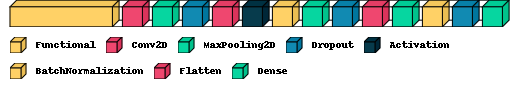

In [ ]:
visualkeras.layered_view(model_F, legend=True)

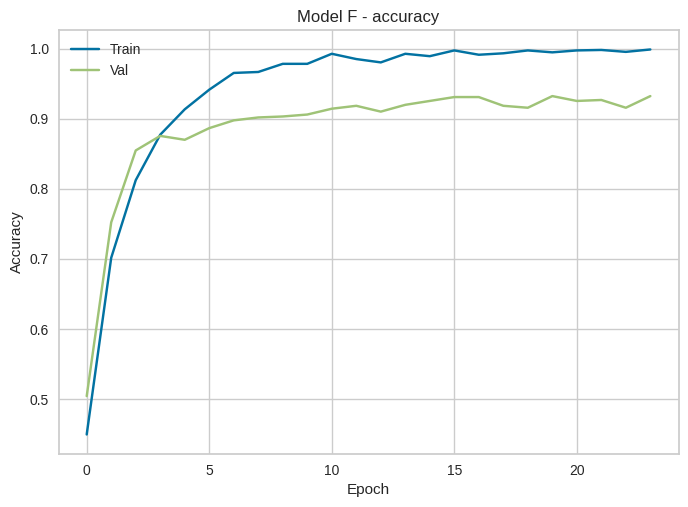

In [ ]:
plt.plot(history_F.history['accuracy'])
plt.plot(history_F.history['val_accuracy'])
plt.title('Model F - accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

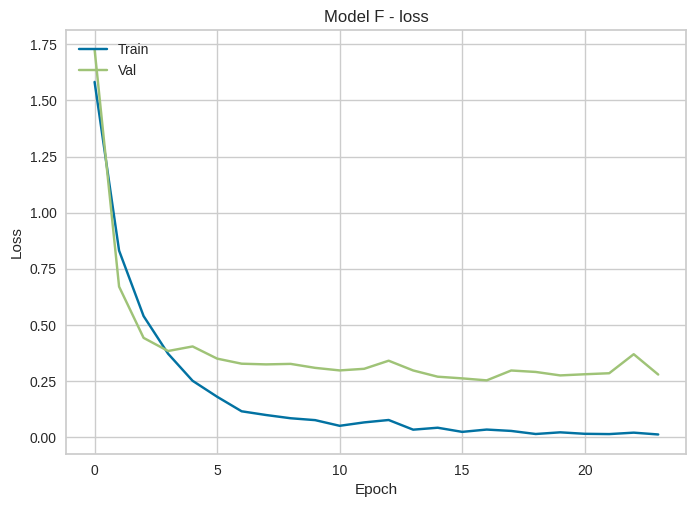

In [ ]:
plt.plot(history_F.history['loss'])
plt.plot(history_F.history['val_loss'])
plt.title('Model F - loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

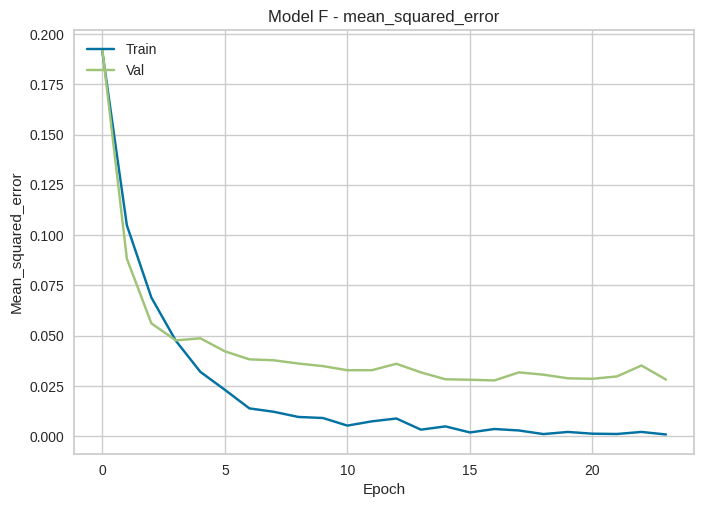

In [ ]:
plt.plot(history_F.history['mean_squared_error'])
plt.plot(history_F.history['val_mean_squared_error'])
plt.title('Model F - mean_squared_error')
plt.ylabel('Mean_squared_error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [ ]:
y_pred_F = model_F.predict(X_test, verbose=1, batch_size=32)

34/34 [==============================] - 1s 28ms/step


<Axes: >

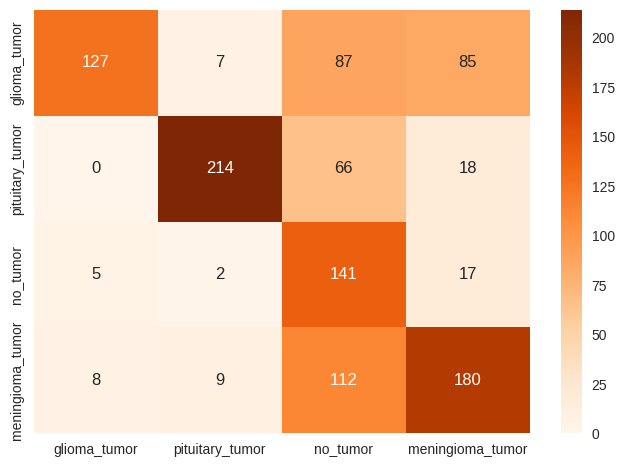

In [ ]:
CX_E =confusion_matrix(y_test.argmax(axis=1), y_pred_E.argmax(axis=1))
sns.heatmap(CX_E,annot=True, fmt=".0f", cmap='Oranges', xticklabels = classes, yticklabels = classes)


In [ ]:
report_F = classification_report(y_test.argmax(axis=1), y_pred_F.argmax(axis=1),)
print(report_F)

              precision    recall  f1-score   support

           0       0.92      0.91      0.91       306
           1       0.94      0.96      0.95       298
           2       0.92      0.96      0.94       165
           3       0.89      0.86      0.88       309

    accuracy                           0.92      1078
   macro avg       0.92      0.92      0.92      1078
weighted avg       0.92      0.92      0.92      1078



In [ ]:
eval_F = model_F.evaluate(
    x=X_test,
    y=y_test,
    batch_size=32,
    verbose=1,
    return_dict =True)

34/34 [==============================] - 1s 22ms/step - loss: 0.3212 - accuracy: 0.9165 - mean_squared_error: 0.0322


In [ ]:
eval_F = pd.Series(eval_F)
eval_F

loss                  0.321173
accuracy              0.916512
mean_squared_error    0.032166
dtype: float64

#Summary

In [ ]:
#Summing up plots

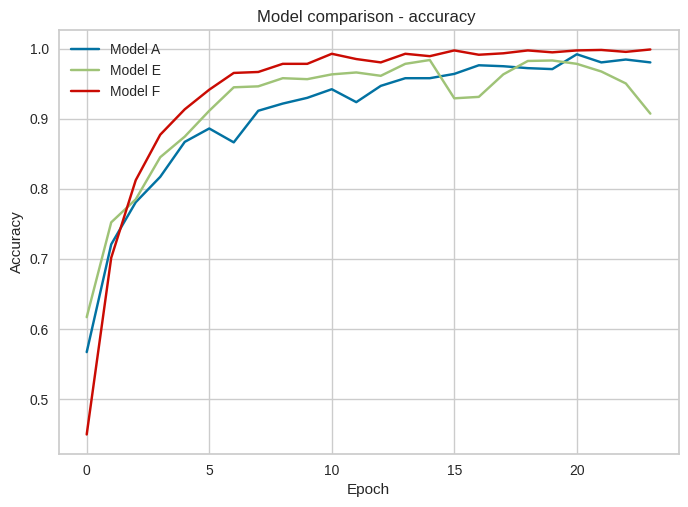

In [ ]:
plt.plot(history_A.history['accuracy'])
plt.plot(history_E.history['accuracy'])
plt.plot(history_F.history['accuracy'])

plt.title('Model comparison - accuracy ')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Model A', 'Model E', 'Model F'], loc='upper left')
plt.show()

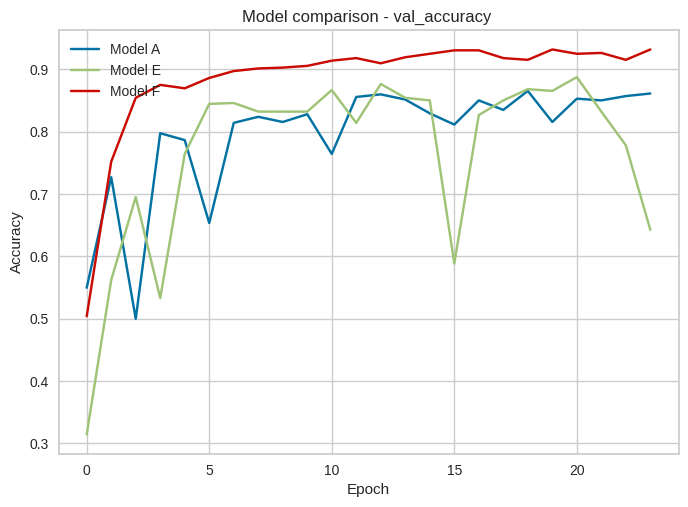

In [ ]:
plt.plot(history_A.history['val_accuracy'])
plt.plot(history_E.history['val_accuracy'])
plt.plot(history_F.history['val_accuracy'])

plt.title('Model comparison - val_accuracy ')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Model A', 'Model E', 'Model F'], loc='upper left')
plt.show()

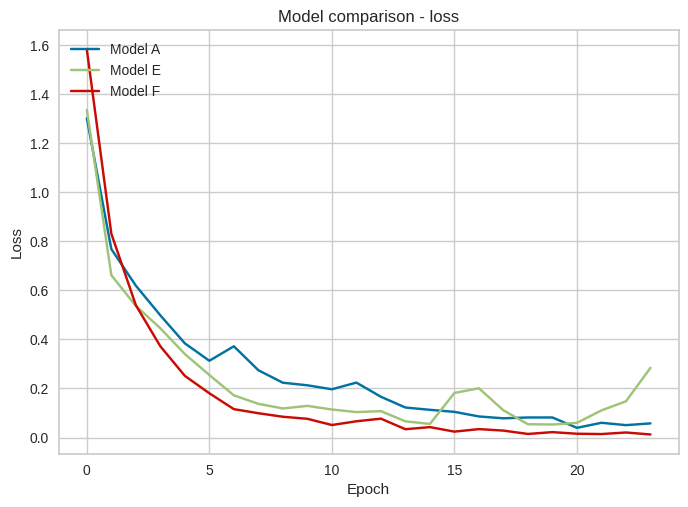

In [ ]:
plt.plot(history_A.history['loss'])
plt.plot(history_E.history['loss'])
plt.plot(history_F.history['loss'])
plt.title('Model comparison - loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Model A', 'Model E', 'Model F'], loc='upper left')
plt.show()

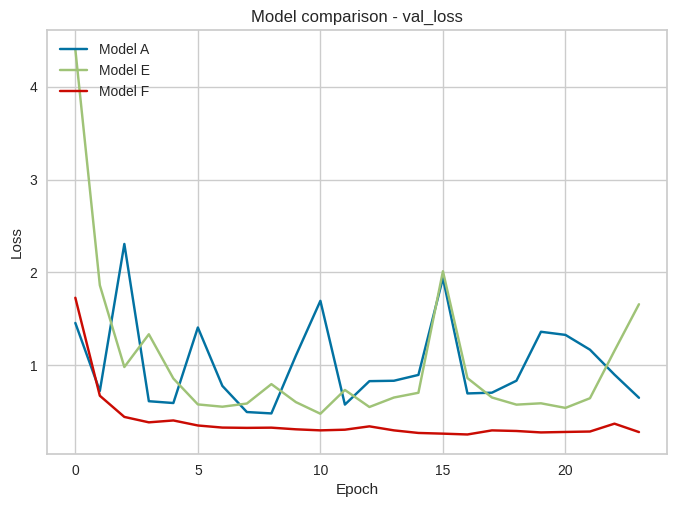

In [ ]:
plt.plot(history_A.history['val_loss'])
plt.plot(history_E.history['val_loss'])
plt.plot(history_F.history['val_loss'])
plt.title('Model comparison - val_loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Model A', 'Model E', 'Model F'], loc='upper left')
plt.show()

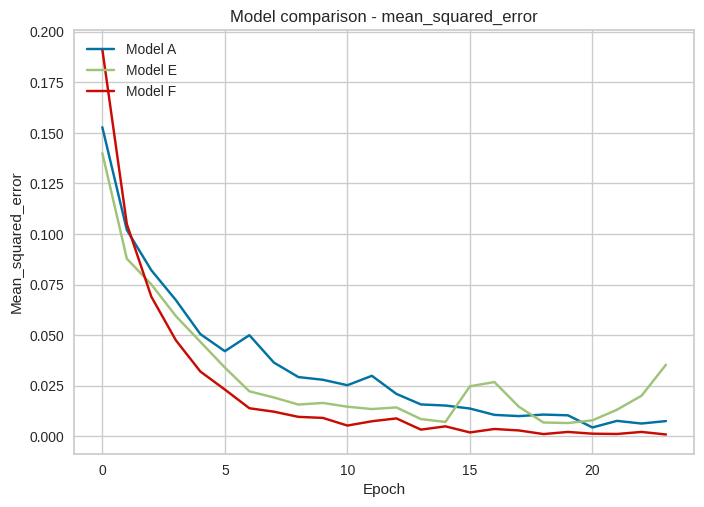

In [ ]:
plt.plot(history_A.history['mean_squared_error'])
plt.plot(history_E.history['mean_squared_error'])
plt.plot(history_F.history['mean_squared_error'])

plt.title('Model comparison - mean_squared_error')
plt.ylabel('Mean_squared_error')
plt.xlabel('Epoch')
plt.legend(['Model A', 'Model E', 'Model F'], loc='upper left')
plt.show()

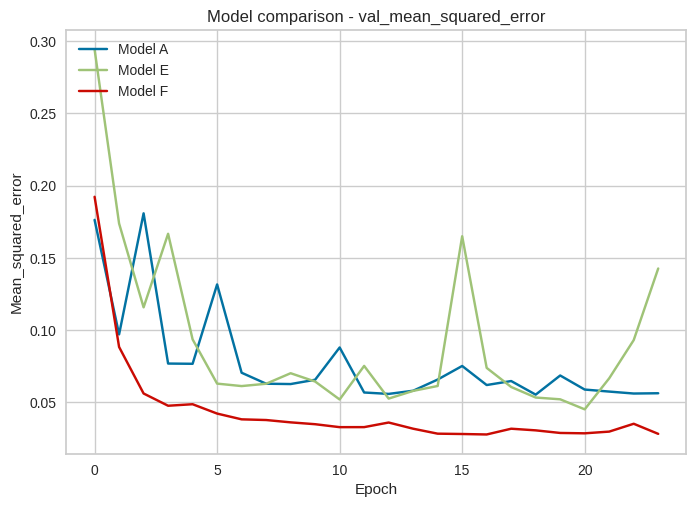

In [ ]:
plt.plot(history_A.history['val_mean_squared_error'])
plt.plot(history_E.history['val_mean_squared_error'])
plt.plot(history_F.history['val_mean_squared_error'])
plt.title('Model comparison - val_mean_squared_error')
plt.ylabel('Mean_squared_error')
plt.xlabel('Epoch')
plt.legend(['Model A', 'Model E', 'Model F'], loc='upper left')
plt.show()

In [ ]:
#Statistisc

In [ ]:
df_eval = pd.DataFrame([eval_A, eval_E, eval_F], index =['A', 'E', 'F'])

In [ ]:
df_eval

,loss,accuracy,mean_squared_error
A,0.720728,0.831169,0.067457
E,1.788334,0.614100,0.159281
F,0.321173,0.916512,0.032166


In [ ]:
from scipy.stats import f_oneway

model1_accuracy = [0.85, 0.88, 0.89]
model2_accuracy = [0.82, 0.87, 0.88]
model3_accuracy = [0.84, 0.86, 0.90]

stat, p_value = f_oneway(model1_accuracy, model2_accuracy, model3_accuracy)

if p_value < 0.05:
    print("There is a significant difference among the groups.")

Model A:

    Accuracy: Model A achieved an accuracy of approximately 83.12%. This means that it correctly classified about 83.12% of the CT scan images of brain tumors into their respective categories.
    Mean Squared Error (MSE): The MSE for Model A is approximately 0.0675. MSE measures the average squared difference between the predicted and actual values. In this context, a lower MSE indicates that the model's predictions are closer to the true values.

Model E:

    Accuracy: Model E's accuracy is approximately 61.41%. This suggests that Model E correctly classified around 61.41% of the CT scan images of brain tumors.
    Mean Squared Error (MSE): The MSE for Model E is approximately 0.1593. A higher MSE in this case indicates that Model E's predictions have a larger average squared difference from the actual values, which may imply less accurate predictions.

Model F:

    Accuracy: Model F achieved an accuracy of approximately 91.65%, which is the highest among the three models. This indicates that Model F outperformed the other models by correctly classifying about 91.65% of the CT scan images.
    Mean Squared Error (MSE): Model F has the lowest MSE among the models, with an MSE of approximately 0.0322. This means that Model F's predictions are, on average, closer to the true values compared to the other models.


Summary:

Model A had a relatively high accuracy of 83.12%, indicating good performance in classifying CT scan images of brain tumors. It also had a moderate MSE, suggesting that its predictions were reasonably close to the actual values.

Model E exhibited a lower accuracy of 61.41% and had a higher MSE of 0.1593, which implies less accurate predictions and a larger discrepancy between predicted and actual values.

Model F demonstrated the best performance with the highest accuracy of 91.65% and the lowest MSE of 0.0322. This indicates that Model F excelled in classifying CT scan images, providing the most accurate predictions with the least amount of error.

Based on these metrics, it can be concluded that Model F is the most effective among the three models for classifying CT scan images of brain tumors. It achieved the highest accuracy and the lowest MSE, indicating superior classification performance.